# Clustering using Buildingsdataset

### Loading libraries

In [1]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale

### Loading Buidings dataset

In [2]:
buildings = pd.read_csv('ICAEN.csv')

In [3]:
buildings.columns

Index(['year', 'emissions', 'municipality', 'surface', 'compactness', 'demand',
       'gas_consume', 'electricity_consume', 'diesel_consume', 'eco_consume',
       'co2', 'energy'],
      dtype='object')

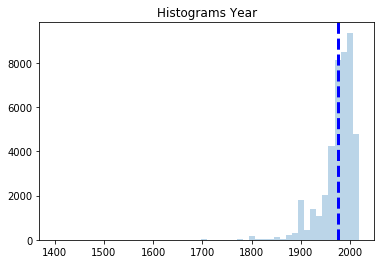

In [4]:
plt.title("Histograms Year")
plt.hist(buildings['year'], bins=50, alpha=0.3,range=[1400,2018])
plt.axvline(buildings['year'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

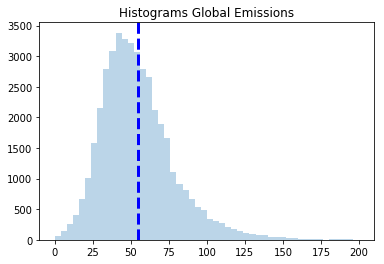

In [5]:
plt.title("Histograms Global Emissions")
plt.hist(buildings['emissions'], bins=50, alpha=0.3,range=[0,200])
plt.axvline(buildings['emissions'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

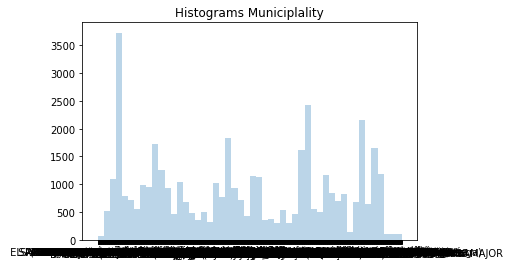

In [6]:
plt.title("Histograms Municiplality")
plt.hist(buildings['municipality'], bins=50, alpha=0.3)
plt.show()

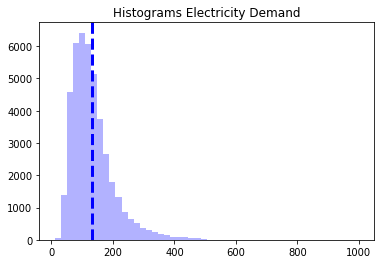

In [7]:
plt.title("Histograms Electricity Demand")
plt.hist(buildings['surface'], bins=50, alpha=0.3,range=[10,1000],color='b')
plt.axvline(buildings['surface'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

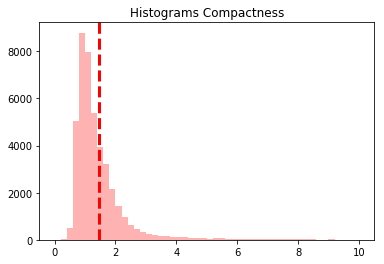

In [8]:
plt.title("Histograms Compactness")
plt.hist(buildings['compactness'], bins=50, alpha=0.3,range=[0,10],color='r')
plt.axvline(buildings['compactness'].mean(), color='r', linestyle='dashed', linewidth=3)
plt.show()

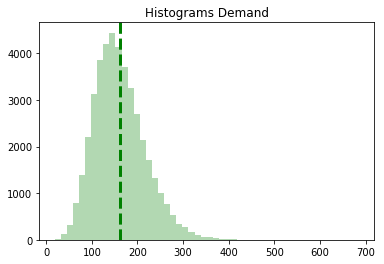

In [9]:
plt.title("Histograms Demand")
plt.hist(buildings['demand'], bins=50, alpha=0.3,color='g')
plt.axvline(buildings['demand'].mean(), color='g', linestyle='dashed', linewidth=3)
plt.show()

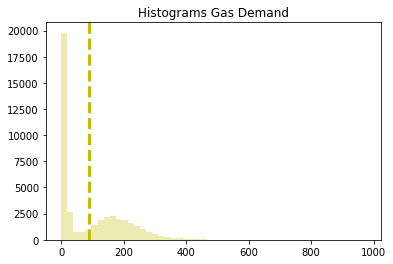

In [10]:
plt.title("Histograms Gas Demand")
plt.hist(buildings['gas_consume'], bins=50, alpha=0.3,color='y')
plt.axvline(buildings['gas_consume'].mean(), color='y', linestyle='dashed', linewidth=3)
plt.show()

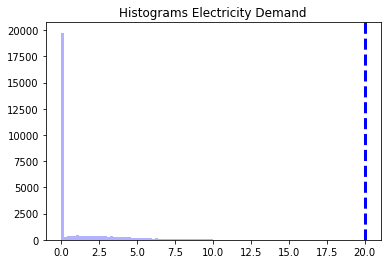

In [11]:
plt.title("Histograms Electricity Demand")
plt.hist(buildings['electricity_consume'], bins=50, alpha=0.3,color='b',range=[0,10])
plt.axvline(buildings['electricity_consume'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

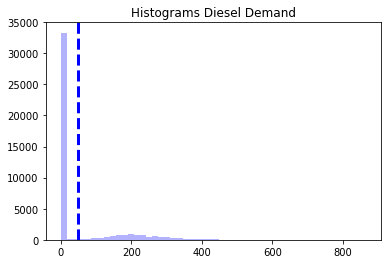

In [12]:
plt.title("Histograms Diesel Demand")
plt.hist(buildings['diesel_consume'], bins=50, alpha=0.3,color='b')
plt.axvline(buildings['diesel_consume'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

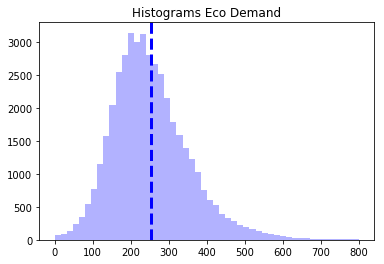

In [13]:
plt.title("Histograms Eco Demand")
plt.hist(buildings['eco_consume'], bins=50, alpha=0.3,color='b',range=[0,800])
plt.axvline(buildings['eco_consume'].mean(), color='b', linestyle='dashed', linewidth=3)
plt.show()

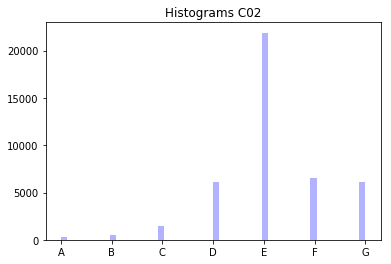

In [14]:
plt.title("Histograms C02")
plt.hist(buildings['co2'], bins=50, alpha=0.3,color='b')
plt.show()

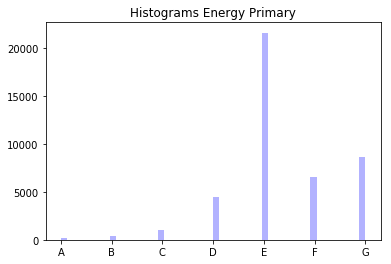

In [15]:
plt.title("Histograms Energy Primary")
plt.hist(buildings['energy'], bins=50, alpha=0.3,color='b')
plt.show()

From the previous graphs we can see that a couple of attributes will introduce a lot of noise to the sample so it won't be taken into consideration

In [16]:
buildings = buildings.drop(columns=['municipality'])

In [17]:
buildings.describe()

,year,emissions,surface,compactness,demand,gas_consume,electricity_consume,diesel_consume,eco_consume
count,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000,42880.000000
mean,1974.918424,54.747486,132.202737,1.462964,161.169241,90.193981,20.055395,49.249727,252.605437
std,34.626120,24.423985,68.493278,1.294691,55.869888,106.397569,42.625697,102.219165,103.025791
min,1400.000000,0.000000,17.100000,0.210000,18.310000,0.000000,0.000000,0.000000,0.000000
25%,1965.000000,38.170000,85.000000,0.910000,121.387500,0.000000,0.000000,0.000000,183.460000
50%,1983.000000,51.200000,118.000000,1.180000,154.765000,30.860000,1.145000,0.000000,239.245000
75%,1999.000000,66.862500,160.250000,1.630000,194.110000,171.822500,19.732500,0.000000,307.580000
max,2017.000000,394.140000,498.000000,104.370000,685.350000,973.940000,1190.760000,864.260000,2326.750000


In [18]:
buildings['energy'] = buildings['energy'].map(lambda x: ord(x))
buildings['co2']= buildings['co2'].map(lambda x: ord(x))

In [19]:
buildings = scale(buildings)

### Defining the number of clusters to produce

In [20]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, init_cluster='k-means++', tolerance=0.0001,loops=10,max_iterations=10,
                    jobs=16):

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=jobs)

        # Calculate Kmeans
        kmeans.fit(dataset)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

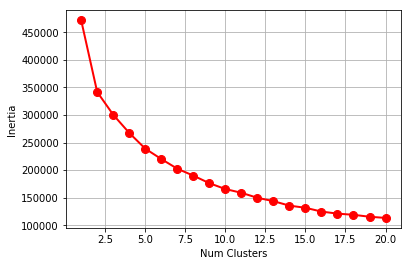

In [21]:
select_clusters(dataset = buildings,loops = 20)

Based on the graph three